In [244]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn import model_selection, preprocessing, linear_model, metrics

In [141]:
data = pd.read_csv('./data/airline_satisfaction.csv')

In [142]:
n, m = data.shape
print(f'Rows: {n} \nFeatures: {m}')

Rows: 128739 
Features: 23


In [143]:
data.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128739 entries, 0 to 128738
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       128739 non-null  object 
 1   Gender                             128739 non-null  object 
 2   Customer Type                      128739 non-null  object 
 3   Age                                128739 non-null  int64  
 4   Type of Travel                     128739 non-null  object 
 5   Class                              128739 non-null  object 
 6   Flight Distance                    128739 non-null  int64  
 7   Seat comfort                       128739 non-null  int64  
 8   Departure/Arrival time convenient  128739 non-null  int64  
 9   Food and drink                     128739 non-null  int64  
 10  Gate location                      128739 non-null  int64  
 11  Inflight wifi service              1287

In [145]:
data.nunique()

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5395
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
dtype: int64

In [146]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128739.000000,128352.000000
mean,39.442158,1982.764640,2.828304,2.974312,2.844142,2.997437,3.249544,3.379986,3.521598,3.475186,3.464304,3.486628,3.694793,3.337567,3.704363,3.353374,14.741757,15.118167
std,15.086466,1028.361578,1.394826,1.523644,1.444289,1.304610,1.318228,1.347701,1.304978,1.304206,1.271391,1.292860,1.155505,1.261225,1.150871,1.297834,38.137619,38.525408
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1360.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2546.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [147]:
data['satisfaction'] = data['satisfaction'].map({
    "satisfied": 1,
    "dissatisfied": 0
})

data["Gender"] = data["Gender"].map({
    "Male": 1,
    "Female": 0
})

data["Class"] = data["Class"].map({
    "Business": 3,
    "Eco Plus": 2,
    "Eco": 1,
})

data["Customer Type"] = data["Customer Type"].map({
    "Loyal Customer": 1, 
    "disloyal Customer": 0
})

data["Type of Travel"] = data["Type of Travel"].map({
    "Business travel": 2,
    "Personal Travel": 1
})

data.drop(columns='Arrival Delay in Minutes', inplace=True)


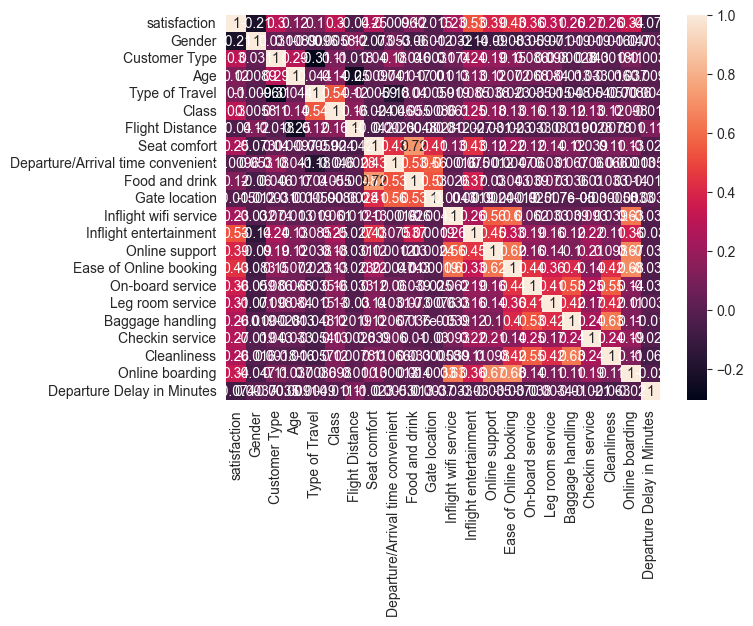

In [148]:
sns.heatmap(data.corr(), annot=True)

plt.rcParams["figure.figsize"] = (18,14)

plt.show()

In [149]:
target = 'satisfaction'

X = data.drop([target], axis=1)
y = data[target]

In [150]:
print("Mean of scaled data: ", np.mean(X, axis=0))

Mean of scaled data:  Gender                                  0.492609
Customer Type                           0.815285
Age                                    39.442158
Type of Travel                          1.696704
Class                                   2.036578
Flight Distance                      1982.764640
Seat comfort                            2.828304
Departure/Arrival time convenient       2.974312
Food and drink                          2.844142
Gate location                           2.997437
Inflight wifi service                   3.249544
Inflight entertainment                  3.379986
Online support                          3.521598
Ease of Online booking                  3.475186
On-board service                        3.464304
Leg room service                        3.486628
Baggage handling                        3.694793
Checkin service                         3.337567
Cleanliness                             3.704363
Online boarding                         3.35337

In [151]:
SEED = 42
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED, stratify=y)

In [152]:
VAL_SIZE = 0.2

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=TEST_SIZE, random_state=SEED, stratify=y_train)

In [153]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

In [154]:
def sigmoid(w, x, b):
    return (1 / (1 + np.exp(-(np.dot(x, w) + b)))) 

In [155]:
initial_w, initial_b = np.zeros((X_train.shape[1],)), 0.0

print(f'Base Logistic Regression Prediction: {sigmoid(initial_w, X_train[0, :], initial_b)}')
print(f'Actual Prediction: {float(y_train[0])}')

Base Logistic Regression Prediction: 0.5
Actual Prediction: 1.0


In [156]:
def calc_loss(W, X, b, y):
    loss = -np.mean((y * np.log(sigmoid(W, X, b))) + ((1 - y) * np.log(sigmoid(W, X, b))))
    return loss

In [265]:
def calc_gd(W, X, b, Y):
    n = len(Y)
    y_hat = sigmoid(W, X, b)
    error = y_hat - Y
    
    dw_dl = np.dot(X.T, error) / n
    db_dl = np.sum(error) / n
    
    return dw_dl, db_dl
    

In [266]:
def calc_w_b(W, X, b, Y, num_iters, alpha):
    error_hist = []
    for _ in range(num_iters):
        dw_dl, db_dl = calc_gd(W, X, b, Y)
        
        W -= alpha * dw_dl
        b -= alpha * db_dl
        
        error_hist.append(calc_loss(W, X, b, Y))
    
    return W, b, error_hist

In [267]:
new_initial_w = np.random.uniform(low=0, high=1, size=(X_train.shape[1],))
new_initial_b = np.random.uniform(0., .05)
iterations = 3000
alpha = 0.01

final_w, final_b, error_hist = calc_w_b(new_initial_w, X_train, new_initial_b, y_train, iterations, alpha)

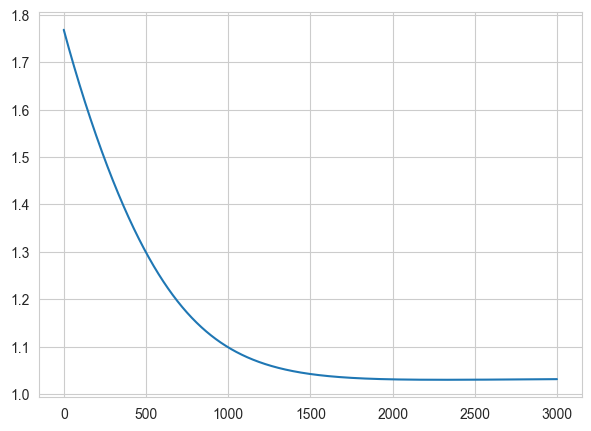

In [268]:
plt.plot([x for x in range(len(error_hist))], error_hist)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [226]:
lr_model = linear_model.LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [269]:
def predict_y(W, X, b, threshold):
    y_hat = sigmoid(W, X, b)
    final_y_hat = np.where(y_hat > threshold, 1, 0)
    return final_y_hat

In [272]:
THRESHOLD = 0.6
y_predict = predict_y(final_w, X_test, final_b, THRESHOLD)

In [276]:
print(f"Accuracy of Personal LR Model on test set: {(metrics.accuracy_score(y_test, y_predict))*100:.2f}%")
print(f"Accuracy of Sklearn LR Model on test set: {(lr_model.score(X_test, y_test))*100:.2f}%")

Accuracy of Personal LR Model on test set: 83.90%
Accuracy of Sklearn LR Model on test set: 83.99%
